In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
res = requests.get('https://pomber.github.io/covid19/timeseries.json').json()

In [121]:
def func_exp(x, a, b, c):
        #c = 0
        return a * np.exp(b * x) + c

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (1, 0.01, 1))
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

[  2.09574772   0.06948353 -36.92527978]


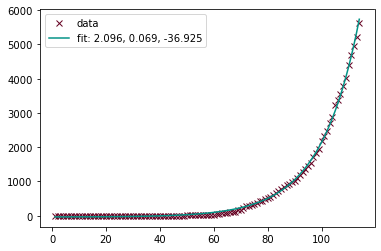

country Afghanistan
mse 1893.227345899552
[ 7.47344830e+01  2.43398268e-02 -1.49998245e+02]


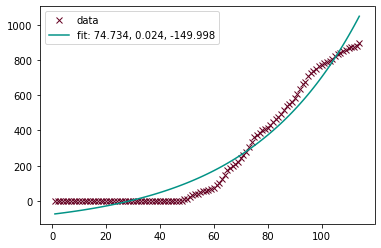

country Albania
mse 3882.0093456195564
[ 8.09207086e+01  3.93640260e-02 -3.16294310e+02]


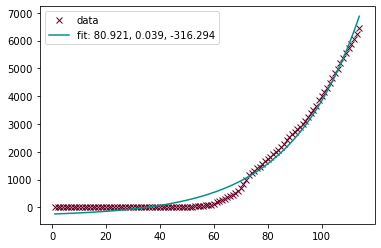

country Algeria
mse 44103.76752655787
[ 2.58641683e+02  1.43711699e-02 -3.74831811e+02]


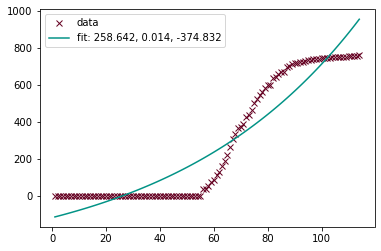

country Andorra
mse 11567.372532909718
[ 1.20739579  0.03332382 -3.52749695]


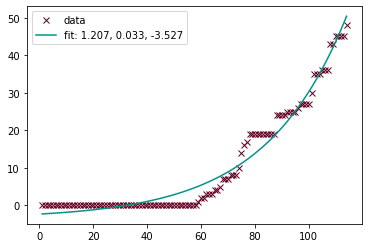

country Angola
mse 6.241380156046131
[ 6.30782463  0.01659281 -9.91238171]


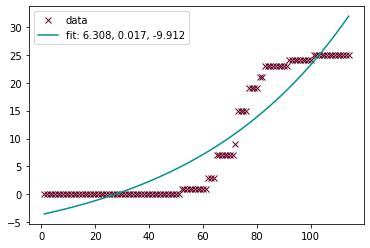

country Antigua and Barbuda
mse 14.05333669269
[ 1.03836743e+02  3.77877871e-02 -3.71271609e+02]


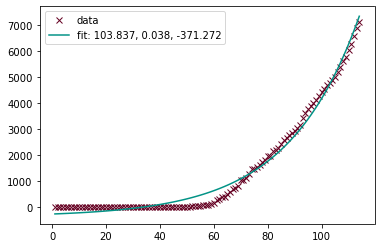

country Argentina
mse 53445.96254309422
[ 3.18020733e+01  4.24718165e-02 -1.21905622e+02]


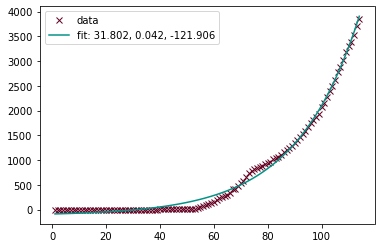

country Armenia
mse 6509.330529914355
[ 4.21181210e+03  1.06080568e-02 -5.41608084e+03]


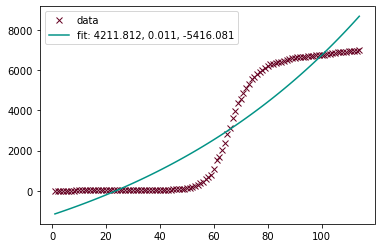

country Australia
mse 1209990.7465108442
[ 8.92187750e+03  1.10235311e-02 -1.16043711e+04]


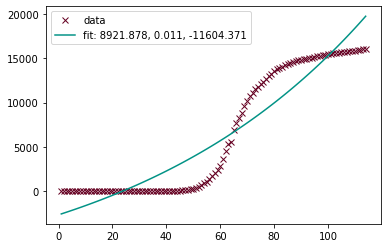

country Austria
mse 5395392.397380879
[ 6.29465582e+01  3.44587524e-02 -2.02719528e+02]


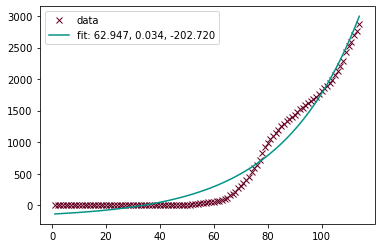

country Azerbaijan
mse 22386.6596399123
[  4.98038712   0.02841862 -12.52350899]


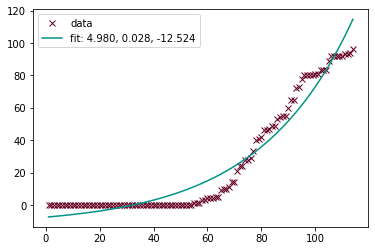

country Bahamas
mse 60.829322552095256
[ 2.39931206e+01  4.86958740e-02 -9.43195337e+01]


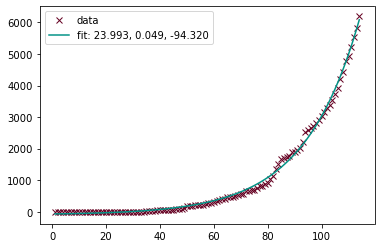

country Bahrain
mse 7415.009650831591
[ 4.12590539e+00  7.45658045e-02 -2.55878251e+02]


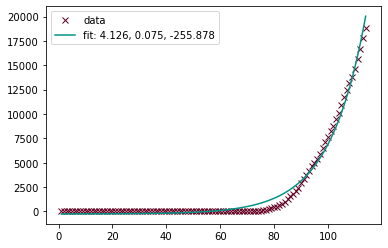

country Bangladesh
mse 207188.68265196474
[ 2.45727083e+01  1.53897062e-02 -3.68711117e+01]


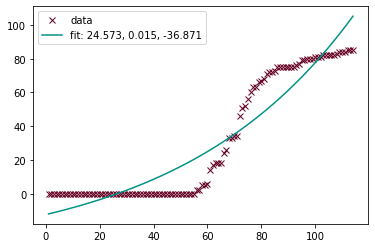

country Barbados
mse 139.87435557421702
[ 2.71366978e+01  6.15650932e-02 -5.83590682e+02]


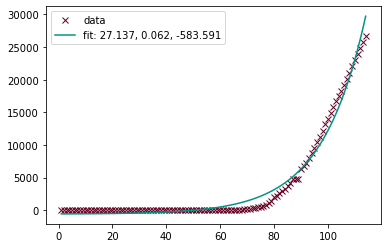

country Belarus
mse 832675.4460613129
[ 4.42266013e+03  2.48510194e-02 -9.43096719e+03]


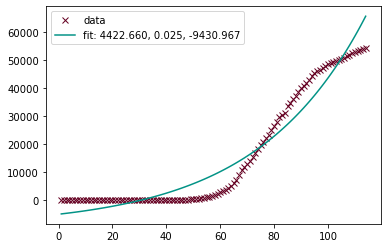

country Belgium
mse 23910226.37839823
[1.84548395e-03 1.07274101e-01 3.39832724e+00]


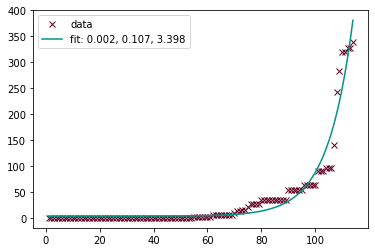

country Benin
mse 282.1255749810509
[ 0.72556131  0.02498888 -1.229924  ]


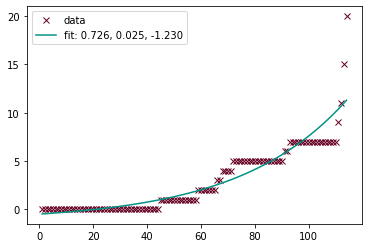

country Bhutan
mse 1.5387317726855914
[  0.78959033   0.07358091 -18.48820493]


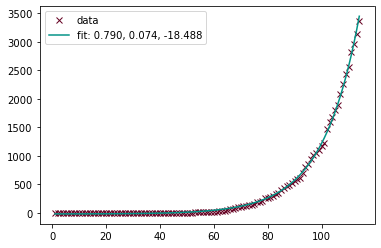

country Bolivia
mse 650.2020946294408
[ 9.53113188e+01  2.96412055e-02 -2.44969057e+02]


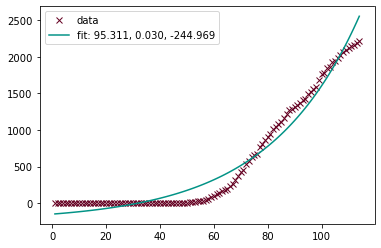

country Bosnia and Herzegovina
mse 19053.42505443468
[ 1.13904873e+02  6.60470438e-02 -2.16233728e+03]


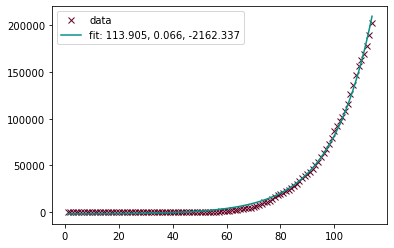

country Brazil
mse 5663040.67998034
[ 1.26872355e+03  1.31125952e-03 -1.30151263e+03]


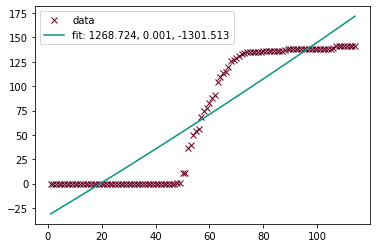

country Brunei
mse 626.4790349355932
[ 4.72228567e+01  3.46964794e-02 -1.39362740e+02]


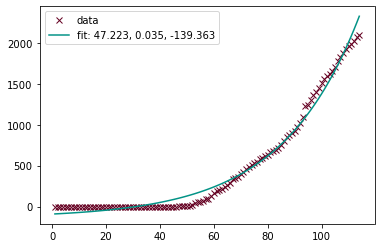

country Bulgaria
mse 5491.091448378079
[ 1.02951742e+02  2.07073533e-02 -1.84027799e+02]


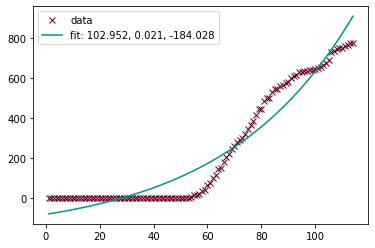

country Burkina Faso
mse 5345.360661577251
[ 0.13688052  0.06832752 -4.19715886]


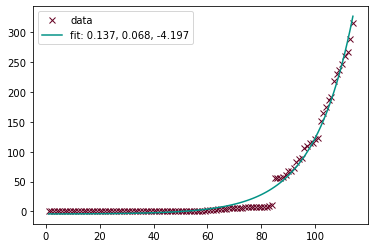

country Cabo Verde
mse 71.35373418063385
[ 3.45057403e+02  3.66133377e-03 -3.71556117e+02]


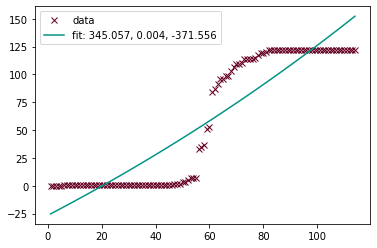

country Cambodia
mse 534.5584039768611
[ 3.10596268e+01  4.07783984e-02 -1.39231989e+02]


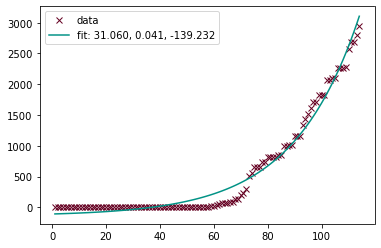

country Cameroon
mse 14095.649035983153
[ 1.45398735e+03  3.62922297e-02 -5.28642660e+03]


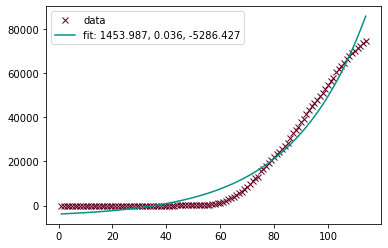

country Canada
mse 15365134.68235725
[ 0.01065501  0.08522824 -0.89813433]


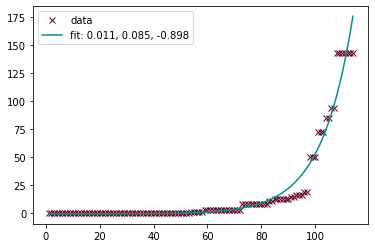

country Central African Republic
mse 58.81232562750774
[ 0.00145566  0.11074187 -0.1527516 ]


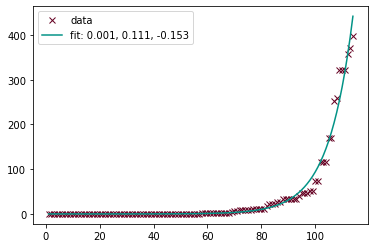

country Chad
mse 154.5649882202108
[ 9.05503032e+01  5.26096023e-02 -5.82573392e+02]


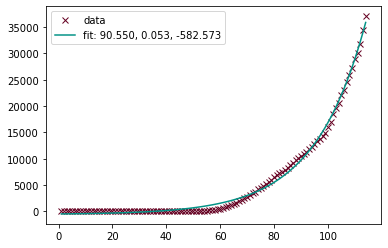

country Chile
mse 346017.4037302351


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [122]:
# resC = res['Russia']
for country in res:
    resC = res[country]
    x = np.linspace(1, len(resC), len(resC))
    y = []
    for d in resC:
        y.append(d['confirmed'])
    # plt.plot(x, y)
    # exponential_regression(x, y)
    # f = lambda x: a * np.exp(b * x) + c 
    mse = mean_squared_error(y, exponential_regression(x, y))
    print("country", country)
    print("mse", mse)